<h2>Methods definition</h2>

In [16]:
def LU_decomposition(A, determinant=False, inverse=False):
    """
    This function decomposes a given matrix 'A' into
    two new matrices 'L' and 'U' so that A = LU. 
    This implementation is based on Crout decomposition.

    Parameters:
    -----------
    A (ndarray or list):
        The square matrix for the decomposition.

    Returns:
    --------
    (list): 
        Returns a list which contains L and U matrices. 
        If determinant or inverse is True, it returns
        them as well.
    """

    # Necessary library
    import numpy as np
    
    # Convert A into numpy.ndarray
    if type(A) != np.ndarray: 
        A = np.array(A)

    # Square matrix dimension
    n = A.shape[0]

    # Initial matrices
    L = np.zeros((n,n))
    U = np.identity(n)

    # determinant and inverse matrix
    det = None
    inv = None
    
    # L and U matrices determination
    L[:,0] = A[:,0]
    U[0,1:] = A[0,1:]/L[0,0]

    for j in range(1, n-1):
        for i in range(j, n):
            L[i,j] = A[i,j] - sum([L[i,k]*U[k,j] for k in range(0, j)])

        for k in range(j+1,n):
            U[j,k] = (A[j,k] - sum([L[j,i]*U[i,k] for i in range(0, j)]))/L[j,j]

    L[-1,-1] = A[-1,-1] - sum([L[-1,k]*U[k,-1] for k in range(0, n)])

    # determinant of A
    if determinant: det = np.product([L[i,i]*U[i,i] for i in range(n)])

    # inverse of A
    if inverse:
        for j in range(n):
            identity_col = [1 if i==j else 0 for i in range(n)]
            temp1 = np.array([identity_col[0]/L[0,0]])
    
            for i in range(1,n):
                temp1 = np.r_[temp1, (identity_col[i] - sum([L[i,k]*temp1[k] for k in range(i)]))/L[i,i]]
    
            temp2 = np.array([temp1[-1]])
            for i in range(n-2,-1,-1):
                temp2 = np.r_[temp2, temp1[i] - sum([U[i,k]*temp2[n-k-1] for k in range(i+1,n)])]
    
            if j != 0:
                inv = np.c_[inv, temp2[::-1]]
            else:
                inv = temp2[::-1]

    return [i for i in [L,U,det,inv] if type(i)!=type(None)]

In [17]:
def power_method(A, accuracy ,i_num, data_export=False):
    """
    This is an iterative method that approximates the 
    dominant eigenvalue and its corresponding eigenvector.

    Parameters:
    -----------
    A (ndarray or list):
        Matrix A.
    accuracy (int):
        The number of significant figures.
    i_num (int):
        The maximum interation number.
    data_export (bool): 
            If True, returns data in each iteration,
            if False, returns only the convergen.

    Returns:
    --------
    (generator): Returns a tuple which contains:
        - iteration number,
        - eigenvalue,
        - eigenvector,
        - relative error,
        - tolerance
    """

    # Necessary library
    import numpy as np

    # Parameter
    eps = 0.5*10**-accuracy
    
    # Convert A into numpy.ndarray
    if type(A) != np.ndarray: 
        A = np.array(A)

    # Square matrix dimension
    n = A.shape[0]

    # initial guess
    x_old = np.random.rand(n)

    # Iteration
    for k in range(1, i_num+1):
        x_new = np.array([sum([A[j,i]*x_old[i] for i in range(n)]) for j in range(n)])
        lambda_new = sum([x_old[i]*x_new[i] for i in range(n)]) / sum([x_old[i]*x_old[i] for i in range(n)])
        x_old = x_new/np.sqrt(sum(x_new**2))
        
         # Convergence criterion
        if k != 1:
            relative_error  = abs((lambda_new - lambda_old)/lambda_new)
            if relative_error < eps:
                yield k, lambda_new , x_old, relative_error, eps
                break

        # Data export
        if data_export == True:
            if k != 1: yield k, lambda_new , x_old, relative_error, eps
            else: yield k, lambda_new , x_old, np.nan, eps

        lambda_old = lambda_new
    else: print('Not Convergent.')

<h2>Initial conditions</h2>

In [18]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.precision', 6)
sns.set_theme()

In [19]:
# The matrix A
A = \
[
    [4,1,2,3,5],
    [1,3,1,4,2],
    [2,1,5,2,3],
    [3,4,2,4,1],
    [5,2,3,1,5]
]

<h2>LU decomposition</h2>

In [20]:
# Calculation of L, U, determinant and inverse matrix
L,U,det,invA = LU_decomposition(A,determinant=True,inverse=True)

In [21]:
# Print determinant value
det.round(3)

-432.0

In [23]:
# Print L, U and inverse matrices
print('L = ')
print(L.round(3))
print('\nU = ')
print(U.round(3))
print('\ninv(A) = ')
print(np.round(invA,3))

L = 
[[ 4.     0.     0.     0.     0.   ]
 [ 1.     2.75   0.     0.     0.   ]
 [ 2.     0.5    3.909  0.     0.   ]
 [ 3.     3.25  -0.091 -2.093  0.   ]
 [ 5.     0.75   0.364 -3.628  4.8  ]]

U = 
[[ 1.     0.25   0.5    0.75   1.25 ]
 [ 0.     1.     0.182  1.182  0.273]
 [ 0.     0.     1.    -0.023  0.093]
 [ 0.     0.     0.     1.     1.733]
 [ 0.     0.     0.     0.     1.   ]]

inv(A) = 
[[ 0.245 -0.458 -0.102  0.343 -0.069]
 [-0.458  0.375 -0.083 -0.083  0.375]
 [-0.102 -0.083  0.259  0.037 -0.028]
 [ 0.343 -0.083  0.037  0.148 -0.361]
 [-0.069  0.375 -0.028 -0.361  0.208]]


In [14]:
# Checking for the correctness of the inverse matrix
np.dot(A,invA).round(3)

array([[ 1.,  0.,  0.,  0.,  0.],
       [-0.,  1., -0.,  0., -0.],
       [-0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  0.,  1.]])

<h2>Power method</h2>

In [15]:
# Data
power_method_data = list(power_method(A, 4, 50, True))
power_method_df = pd.DataFrame(power_method_data, columns=['Iteration', 'λ', 'v', 'e', 'eps']).set_index('Iteration')
power_method_df.v = power_method_df.v.apply(lambda vec: vec.round(3))
power_method_df

,λ,v,e,eps
Iteration,,,,
1,13.144509,"[0.472, 0.326, 0.437, 0.452, 0.525]",NaN,0.00005
2,14.041266,"[0.503, 0.338, 0.422, 0.422, 0.526]",0.063866,0.00005
3,14.073773,"[0.504, 0.332, 0.418, 0.42, 0.534]",0.002310,0.00005
4,14.075462,"[0.505, 0.332, 0.417, 0.419, 0.535]",0.000120,0.00005
5,14.075597,"[0.505, 0.331, 0.417, 0.418, 0.535]",0.000010,0.00005


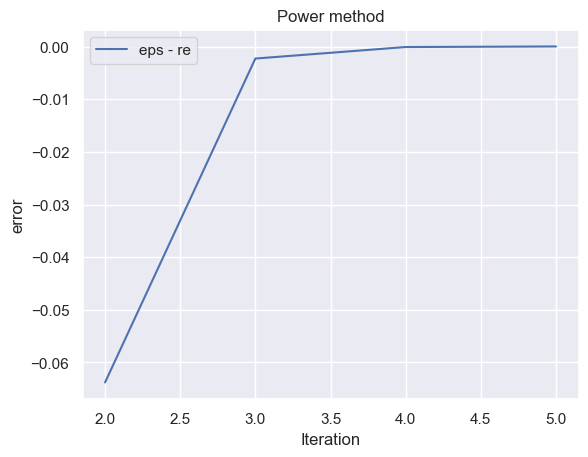

In [16]:
# Line plots of errors
sns.lineplot((power_method_df.eps - power_method_df.e)[1:], label='eps - re')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('error')
plt.title('Power method')
plt.legend()
plt.show()